In [1]:
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt

In [2]:
db = pd.read_csv("capture20110818-2.binetflow")
#db['Sport'] = db['Sport'].astype(int)
#db['Dport'] = db['Dport'].astype(int)

In [3]:
print(db)

                         StartTime         Dur Proto         SrcAddr  Sport  \
0       2011/08/18 15:39:35.087798   83.062141   tcp   147.32.84.202   1078   
1       2011/08/18 15:39:35.087915  497.720459   tcp  88.100.184.137  13121   
2       2011/08/18 15:39:35.091007  971.288147   tcp     147.32.84.2     80   
3       2011/08/18 15:39:35.091585  899.996399   tcp    90.181.84.58  54518   
4       2011/08/18 15:39:35.093493   38.753445   tcp   147.32.86.116  19083   
...                            ...         ...   ...             ...    ...   
107246  2011/08/18 15:55:46.347093    0.000313   udp    147.32.85.25  57375   
107247  2011/08/18 15:55:46.357022    0.000000   udp    147.32.84.59  63550   
107248  2011/08/18 15:55:46.357936    0.001958   udp    91.144.30.99  59481   
107249  2011/08/18 15:55:46.379560    0.000258   udp    147.32.85.25  57012   
107250  2011/08/18 15:55:46.379941    0.000246   udp    147.32.85.25  52134   

          Dir        DstAddr  Dport    State  sTos 

In [4]:
db['Label'].unique()

array(['flow=Background', 'flow=Background-Established-cmpgw-CVUT',
       'flow=From-Normal-V52-Grill', 'flow=To-Background-Stribrek',
       'flow=Background-google-analytics4',
       'flow=Background-UDP-Established',
       'flow=From-Background-CVUT-Proxy',
       'flow=Background-Attempt-cmpgw-CVUT',
       'flow=Background-UDP-Attempt',
       'flow=To-Background-UDP-CVUT-DNS-Server',
       'flow=To-Background-CVUT-Proxy',
       'flow=Background-UDP-NTP-Established-1',
       'flow=Background-TCP-Established', 'flow=Background-TCP-Attempt',
       'flow=Background-ajax.google',
       'flow=Background-google-analytics10',
       'flow=Background-google-analytics11', 'flow=From-Normal-V52-Jist',
       'flow=Background-google-webmail',
       'flow=To-Background-CVUT-WebServer',
       'flow=Background-google-analytics1',
       'flow=From-Normal-V52-Stribrek',
       'flow=Background-google-analytics15',
       'flow=Background-google-analytics12',
       'flow=Background-goo

In [5]:
malicious = list(filter(lambda x: "Botnet" in x, db['Label'].unique()))

In [6]:
print(malicious)

['flow=From-Botnet-V52-1-UDP-DNS', 'flow=From-Botnet-V52-1-TCP-HTTP-Google-Net-Established-6', 'flow=From-Botnet-V52-1-UDP-Attempt', 'flow=From-Botnet-V52-2-UDP-DNS', 'flow=From-Botnet-V52-2-TCP-HTTP-Google-Net-Established-6', 'flow=From-Botnet-V52-3-UDP-DNS', 'flow=From-Botnet-V52-2-UDP-Attempt', 'flow=From-Botnet-V52-3-TCP-HTTP-Google-Net-Established-6', 'flow=From-Botnet-V52-3-UDP-Attempt', 'flow=From-Botnet-V52-3-TCP-CC106-IRC-Not-Encrypted', 'flow=From-Botnet-V52-1-TCP-Established', 'flow=From-Botnet-V52-2-TCP-CC106-IRC-Not-Encrypted', 'flow=From-Botnet-V52-2-ICMP', 'flow=From-Botnet-V52-1-ICMP']


In [7]:
all_bad_db = db[db["Label"].isin(malicious)]
all_good_db = db[~ db["Label"].isin(malicious)]
all_bad_db

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
53987,2011/08/18 15:47:57.983212,0.000197,udp,147.32.84.165,1025,<->,147.32.80.9,53,CON,0.0,0.0,2,203,64,flow=From-Botnet-V52-1-UDP-DNS
54222,2011/08/18 15:48:00.231242,0.020501,udp,147.32.84.165,1025,<->,147.32.80.9,53,CON,0.0,0.0,2,590,87,flow=From-Botnet-V52-1-UDP-DNS
54225,2011/08/18 15:48:00.252763,0.036866,tcp,147.32.84.165,1027,->,74.125.232.201,80,SRPA_SPA,0.0,0.0,7,882,629,flow=From-Botnet-V52-1-TCP-HTTP-Google-Net-Est...
54485,2011/08/18 15:48:02.467929,0.000668,udp,147.32.84.165,1025,<->,147.32.80.9,53,CON,0.0,0.0,2,479,76,flow=From-Botnet-V52-1-UDP-DNS
54486,2011/08/18 15:48:02.477619,3.012514,udp,147.32.84.165,123,->,65.55.56.40,123,INT,0.0,NaN,2,180,180,flow=From-Botnet-V52-1-UDP-Attempt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102053,2011/08/18 15:54:55.589358,0.000000,icmp,147.32.84.165,0x75a4,->,147.32.96.69,NaN,UNK,0.0,NaN,1,1066,1066,flow=From-Botnet-V52-1-ICMP
102054,2011/08/18 15:54:55.589534,0.000000,icmp,147.32.84.165,0xf88e,->,147.32.96.69,NaN,UNK,0.0,NaN,1,1066,1066,flow=From-Botnet-V52-1-ICMP
102055,2011/08/18 15:54:55.591005,0.000000,icmp,147.32.84.165,0x903f,->,147.32.96.69,NaN,UNK,0.0,NaN,1,1066,1066,flow=From-Botnet-V52-1-ICMP
102057,2011/08/18 15:54:55.591947,0.000000,icmp,147.32.84.165,0x0744,->,147.32.96.69,NaN,UNK,0.0,NaN,1,1066,1066,flow=From-Botnet-V52-1-ICMP


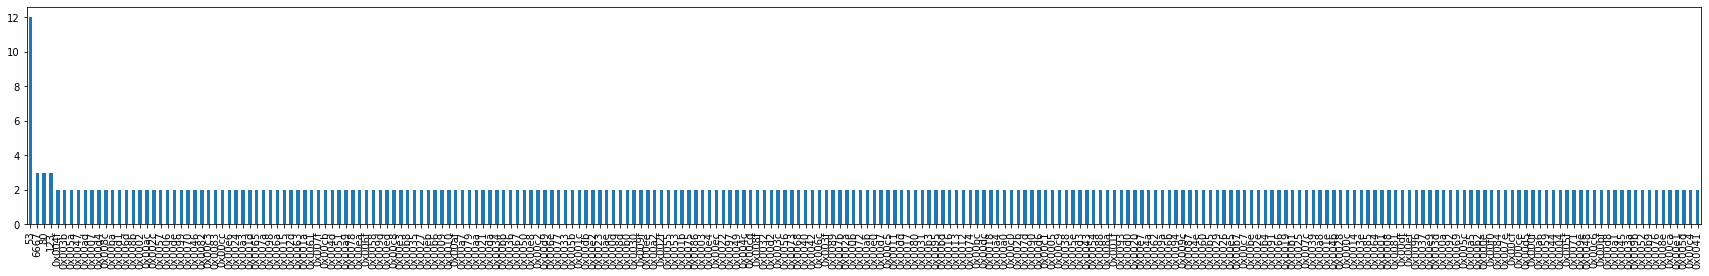

In [8]:
plt.figure();

#all_bad_db['Dport'].plot(kind="bar");
#all_bad_db['Dport'].count()#.plot(kind='bar')
#all_bad_db['Dport'].value_counts().plot.hist(bins= 3000,rwidth=None, color='#607c8e', stacked=True)
ax = all_bad_db['Dport'].value_counts().plot(kind='bar',
figsize=(30, 4),
 #                                        title=title,
 #                                        color=[c.values]
                                    )

In [9]:
all_bad_db['Dport'].value_counts()

53        12
6667       3
80         3
123        3
0x004f     2
          ..
0x00ca     2
0x00e1     2
0x005d     2
0x00c4     2
0x0041     2
Name: Dport, Length: 244, dtype: int64

In [10]:
all_bad_db['SrcAddr'].value_counts()

147.32.84.165    4151
147.32.84.191    4006
147.32.84.192       7
Name: SrcAddr, dtype: int64

In [11]:
all_good_db['Dir'].value_counts()

  <->    71221
   ->    24704
  <?>     2030
  <-       806
   ?>      270
  who       56
Name: Dir, dtype: int64

In [12]:
all_bad_db['Proto'].value_counts()

icmp    8143
udp       15
tcp        6
Name: Proto, dtype: int64

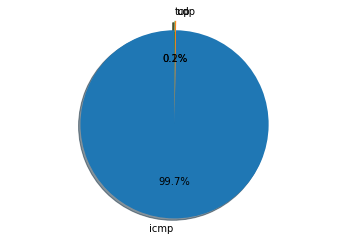

In [13]:
#protocol which labled as botnet
#8164
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'icmp', 'udp', 'tcp'
sizes = [8143/8164, 15/8164, 6/8164]
explode = (0, 0.1, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [83]:
dbFrame = pd.read_csv("timeframeOfAttack.binetflow")

In [95]:
#   Preparing Data for plotting
#   Format: %H:%M:%S.%f
#   Ex:     15:48:00.005194

#  packed size shown in a timeline

dbFrame = pd.read_csv("timeframeOfAttack.binetflow")
# computes avg packed size per milisecond

dbFrame['StartTime'] = dbFrame['StartTime'].str.split()

dbFrame = dbFrame.reset_index()  # make sure indexes pair with number of rows

for index, row in dbFrame.iterrows():
    
    dbFrame['StartTime'][index].pop(0)
    s = ''.join(str(x) for x in dbFrame['StartTime'][index])
    dbFrame['StartTime'][index] = s

dbFrame['StartTime'] = pd.to_datetime(dbFrame['StartTime'], format="%H:%M:%S.%f")

print(dbFrame['StartTime'])

0    1900-01-01 15:48:00.005194
1    1900-01-01 15:48:00.005660
2    1900-01-01 15:48:00.020767
3    1900-01-01 15:48:00.040807
4    1900-01-01 15:48:00.078666
                ...            
94   1900-01-01 15:48:00.530532
95   1900-01-01 15:48:00.533094
96   1900-01-01 15:48:00.541256
97   1900-01-01 15:48:00.550498
98   1900-01-01 15:48:00.555237
Name: StartTime, Length: 99, dtype: datetime64[ns]


/var/folders/7d/znvlxjq50rg2jt7bvbnx_n1m0000gn/T/ipykernel_86756/3211839175.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dbFrame['StartTime'][index] = s


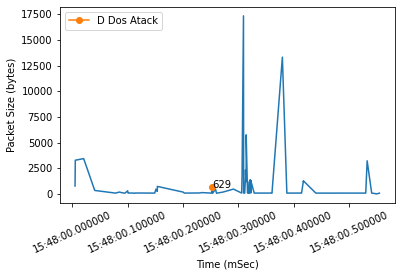

In [85]:
import matplotlib.dates as md
import dateutil

db1 = dbFrame['StartTime']

db2 = dbFrame['SrcBytes']

result = pd.concat([db1, db2], axis=1, join='inner')
#display(result)
plt_data = range(5,9)
plt.subplots_adjust(bottom=0.2)
plt.xticks( rotation=25 )

ax=plt.gca()
#ax.set_xticks(db1)


xfmt = md.DateFormatter('%H:%M:%S.%f')
ax.xaxis.set_major_formatter(xfmt)

ax.tick_params(colors='black', which='both')

ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')

plt.plot(db1,db2)
plt.plot(db1[30],db2[30], "o-", label="D Dos Atack")

plt.annotate(db2[30], (db1[30],db2[30]))

plt.legend(loc="upper left")

plt.xlabel('Time (mSec)')
plt.ylabel('Packet Size (bytes)')

plt.show()

In [86]:
dbMin = dbFrame['SrcBytes'].min()
print(dbMin)

0


In [100]:
# average packet size in the timeframe of a DDos-attack

dbFrame = pd.read_csv("timeframeOfAttack.binetflow")

dbFrame['StartTime'] = dbFrame['StartTime'].str.split()

dbFrame = dbFrame.reset_index()  # make sure indexes pair with number of rows

for index, row in dbFrame.iterrows():
    
    dbFrame['StartTime'][index].pop(0)
    s = ''.join(str(x) for x in dbFrame['StartTime'][index])
    dbFrame['StartTime'][index] = s

dbFrame['StartTime'] = pd.to_datetime(dbFrame['StartTime'], format="%H:%M:%S.%f")

# creating new data frame
dbAvg = pd.DataFrame(columns=['StartTime', 'SrcBytes'])

dbFrame = dbFrame.reset_index()

for index, row in dbFrame.iterrows():
    #df = df.reset_index(drop=True)
    if index < 95:
        flows = [dbFrame['SrcBytes'][index],dbFrame['SrcBytes'][index+1],dbFrame['SrcBytes'][index+2],dbFrame['SrcBytes'][index+3],dbFrame['SrcBytes'][index+4]]
            #accumulate every 5 rows in packet size
        for x in flows:
            avgPacketSize += x  
    #compute avg
    avgPacketSize = avgPacketSize/5

    dbAvg.loc[len(dbAvg.index)] = [dbFrame['StartTime'][index],avgPacketSize]


    index += 4

#dbAvg = dbFrame['SrcBytes'].mean()
print(dbAvg)

                    StartTime     SrcBytes
0  1900-01-01 15:48:00.005194  1576.075023
1  1900-01-01 15:48:00.005660  1773.015005
2  1900-01-01 15:48:00.020767  1173.403001
3  1900-01-01 15:48:00.040807   382.680600
4  1900-01-01 15:48:00.078666   173.136120
..                        ...          ...
94 1900-01-01 15:48:00.530532   859.447108
95 1900-01-01 15:48:00.533094   171.889422
96 1900-01-01 15:48:00.541256    34.377884
97 1900-01-01 15:48:00.550498     6.875577
98 1900-01-01 15:48:00.555237     1.375115

[99 rows x 2 columns]


/var/folders/7d/znvlxjq50rg2jt7bvbnx_n1m0000gn/T/ipykernel_86756/3033586959.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dbFrame['StartTime'][index] = s


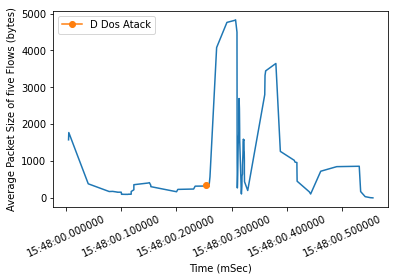

In [99]:
import matplotlib.dates as md
import dateutil

 
plt_data = range(5,9)
plt.subplots_adjust(bottom=0.2)
plt.xticks( rotation=25 )

ax=plt.gca()
#ax.set_xticks(db1)


xfmt = md.DateFormatter('%H:%M:%S.%f')
ax.xaxis.set_major_formatter(xfmt)

ax.tick_params(colors='black', which='both')

ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')

plt.plot(dbAvg["StartTime"],dbAvg["SrcBytes"])
plt.plot(dbAvg["StartTime"][30],dbAvg["SrcBytes"][30], "o-", label="D Dos Atack")

#plt.annotate(dbAvg["SrcBytes"][30], dbAvg["StartTime"][30],dbAvg["SrcBytes"][30])
plt.legend(loc="upper left")

plt.xlabel('Time (mSec)')
plt.ylabel('Average Packet Size of five Flows (bytes)')

plt.show()